In [67]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [115]:
#reading the loandata
loan_data = pd.read_csv("loan.csv")

<Axes: >

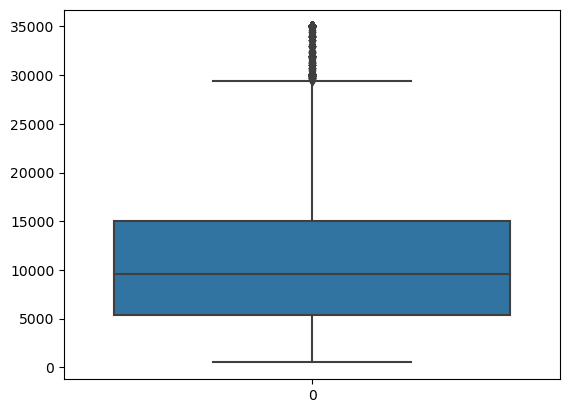

In [116]:
sns.boxplot(loan_data["funded_amnt"])

In [70]:
loan_data.shape

(39717, 111)

#### check or null value counts

In [119]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### removing columns with null values

In [120]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)

In [122]:
loan_data.shape

(39717, 57)

<Axes: >

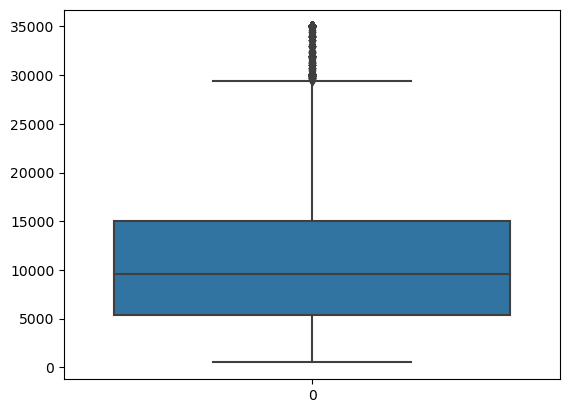

In [123]:
sns.boxplot(loan_data["funded_amnt"])

#### now we have 57 columns in the dataframe


In [124]:
# finding single valued columns
loan_data.columns[loan_data.nunique() == 1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

#### dropping single valued columns from dataframe

In [125]:
loan_data = loan_data.drop(loan_data.columns[loan_data.nunique() == 1], axis=1)

In [126]:
loan_data.shape

(39717, 48)

<Axes: >

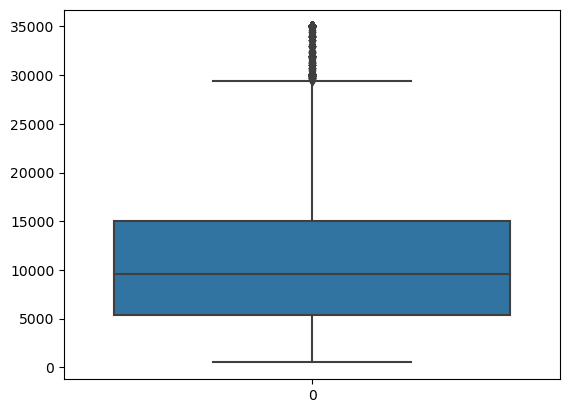

In [127]:
sns.boxplot(loan_data["funded_amnt"])

### Now we have to analyse this 48 columns and look for unrelevant information
 -  url and desc can be removed as they are descriptive values and nothing much can de derived from it

In [128]:
loan_data.drop(['url','desc'],axis=1,inplace = True)

In [129]:
loan_data.shape

(39717, 46)

In [130]:
100*loan_data.isnull().mean()

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
o

#### in the above code we calculate the null value mean percentage and we can see that columns next_pymnt_d,mths_since_last_record and mths_since_last_delinq are having more than 90% of null values.So dropping them

In [131]:
loan_data.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace = True)

In [132]:
loan_data.shape

(39717, 43)

#### replacing the emptitle null values with not provided and the emp_length(years of experience) with 0( assuming not provided means the applier is not working

In [133]:
loan_data['emp_title'].fillna('not provided',inplace =True)

In [135]:
loan_data['emp_length'].fillna(0,inplace = True)

In [136]:
100*loan_data.isnull().mean()

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  0.000000
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.027696
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0

#### here we are dropping the records with null values <1%

In [137]:
loan_data['title'].fillna('not provided',inplace =True)

In [138]:
loan_data.dropna(subset=['last_credit_pull_d', 'last_pymnt_d','revol_util','pub_rec_bankruptcies'],inplace =True)

In [141]:
loan_data.shape


(38902, 43)

<Axes: >

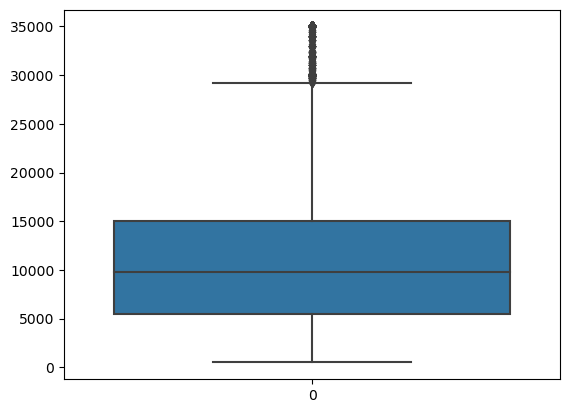

In [142]:
sns.boxplot(loan_data["funded_amnt"])

In [143]:
100*loan_data.isnull().mean()

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_py

In [144]:
loan_data.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util          

### Standardising the data

#### convert revol_util and int_rate to numeric

In [145]:
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype('float')

In [146]:
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype('float')

<Axes: >

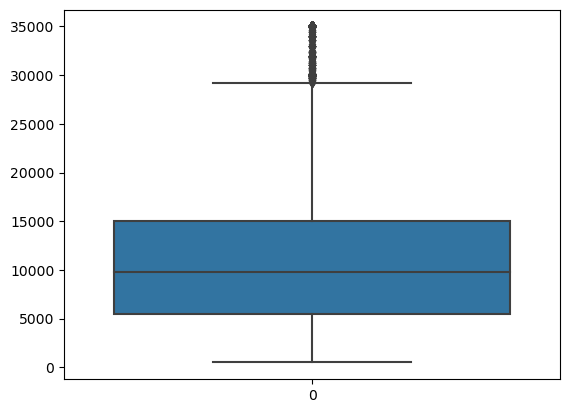

In [149]:
sns.boxplot(loan_data["funded_amnt"])

In [150]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


#### filtering data for laon_status = ' Charged Off' as the objective is to find patters for the customers who default

In [152]:
loan_data = loan_data[loan_data['loan_status'] == 'Charged Off']

In [156]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-12,121.45,Mar-13,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,...,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-12,305.38,Nov-12,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,B2,...,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Oct-13,325.74,Mar-14,0.0


In [158]:
loan_data.reset_index(drop=True, inplace=True)

In [160]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
1,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
2,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-12,121.45,Mar-13,0.0
3,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,...,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-12,305.38,Nov-12,0.0
4,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,B2,...,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Oct-13,325.74,Mar-14,0.0


<Axes: >

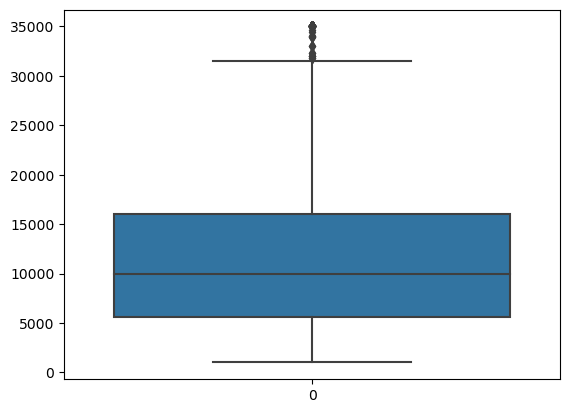

In [161]:
sns.boxplot(loan_data["funded_amnt"])

### Check for Outliers and removing if necessary

In [94]:
df.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5425 entries, 1 to 39666
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5425 non-null   int64  
 1   member_id                5425 non-null   int64  
 2   loan_amnt                5425 non-null   int64  
 3   funded_amnt              5425 non-null   int64  
 4   funded_amnt_inv          5425 non-null   float64
 5   term                     5425 non-null   object 
 6   int_rate                 5425 non-null   float64
 7   installment              5425 non-null   float64
 8   grade                    5425 non-null   object 
 9   sub_grade                5425 non-null   object 
 10  emp_title                5425 non-null   object 
 11  emp_length               5425 non-null   object 
 12  home_ownership           5425 non-null   object 
 13  annual_inc               5425 non-null   float64
 14  verification_status      542

In [162]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [163]:
loan_data.shape

(5425, 43)

In [164]:
print(loan_data['loan_status'].unique)


<bound method Series.unique of 0       Charged Off
1       Charged Off
2       Charged Off
3       Charged Off
4       Charged Off
           ...     
5420    Charged Off
5421    Charged Off
5422    Charged Off
5423    Charged Off
5424    Charged Off
Name: loan_status, Length: 5425, dtype: object>


In [165]:
loan_data['annual_inc'].value_counts()

annual_inc
60000.0     249
50000.0     160
40000.0     155
30000.0     137
36000.0     127
           ... 
43008.0       1
117600.0      1
26784.0       1
38616.0       1
11029.0       1
Name: count, Length: 1224, dtype: int64

In [166]:
print(loan_data['annual_inc'].dtypes)

float64


In [106]:
import seaborn as sns

In [167]:
loan_data.shape

(5425, 43)

#### identifying outliers and managing them

<Axes: >

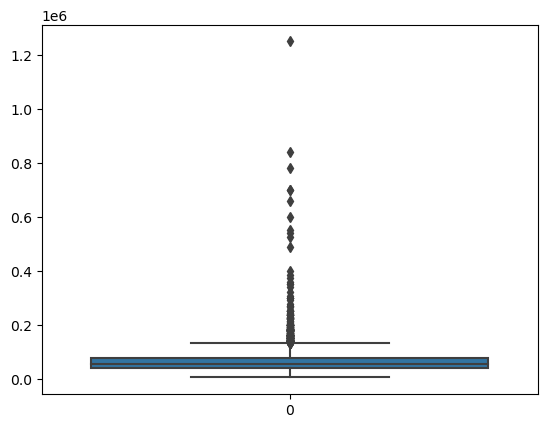

In [169]:
sns.boxplot(loan_data["annual_inc"])

In [171]:
loan_data.annual_inc.quantile([0.10,0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.10     27000.00
0.25     37440.00
0.50     53000.00
0.75     75000.00
0.90    103140.00
0.95    130000.00
0.97    150000.00
0.98    173455.68
0.99    202760.00
Name: annual_inc, dtype: float64

In [173]:
loan_data=loan_data[loan_data.annual_inc <= loan_data['annual_inc'].quantile(0.98)]

<Axes: >

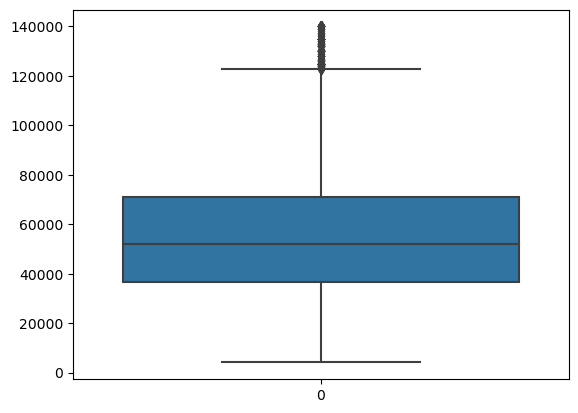

In [175]:
sns.boxplot(loan_data["annual_inc"])

<Axes: >

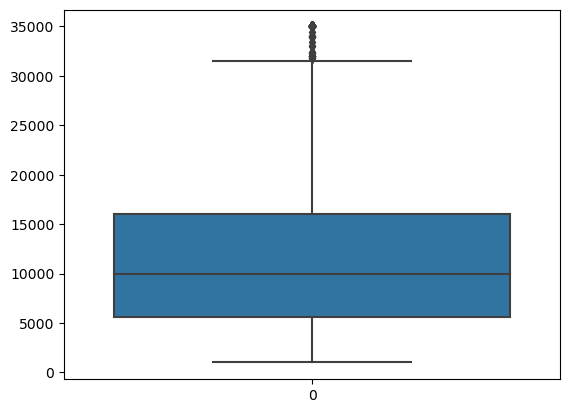

In [177]:
sns.boxplot(loan_data["loan_amnt"])

<Axes: >

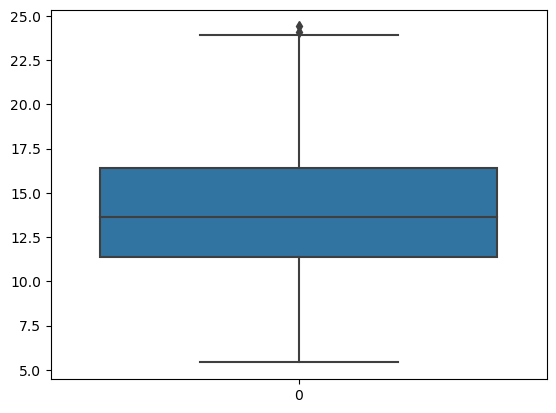

In [178]:
sns.boxplot(loan_data["int_rate"])

<Axes: >

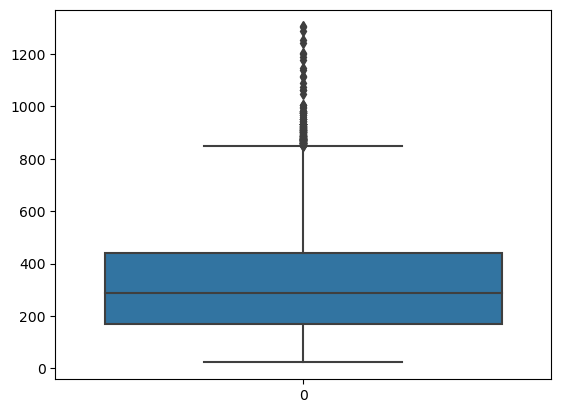

In [180]:
sns.boxplot(loan_data["installment"])

<Axes: >

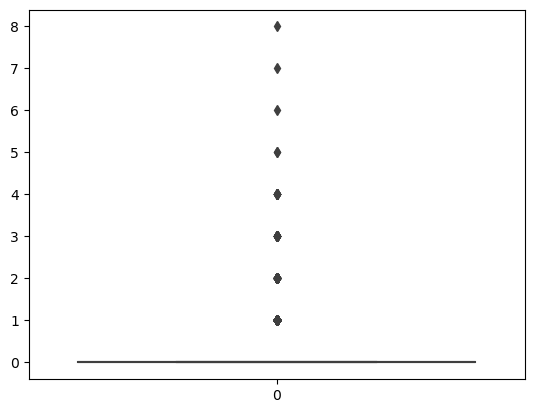

In [181]:
sns.boxplot(loan_data["delinq_2yrs"])

### The objective is to identify patterns from default applicant data so that in fiture bank can use the observations to identify the if a loan applicant will default or not

#### starting with univariate analysis..

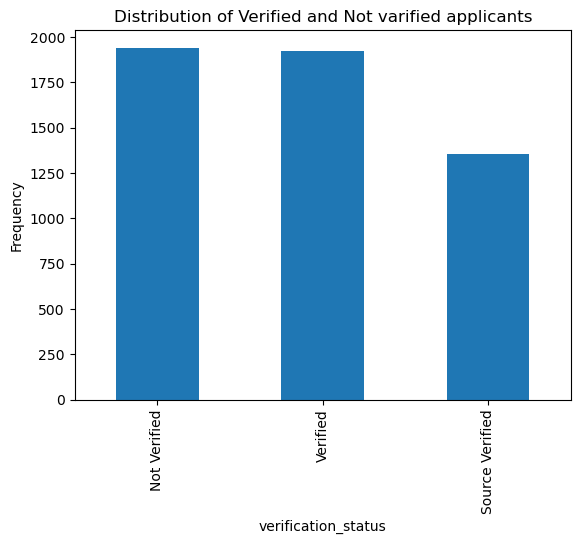

In [185]:
verified_or_not = loan_data['verification_status'].value_counts()

# Create a bar plot
verified_or_not.plot.bar()

# Add title and labels
plt.title('Distribution of Verified and Not varified applicants')
plt.xlabel('verification_status')
plt.ylabel('Frequency')

# Display the plot
plt.show()

### The verified and not verified  are almost equal for default applicants

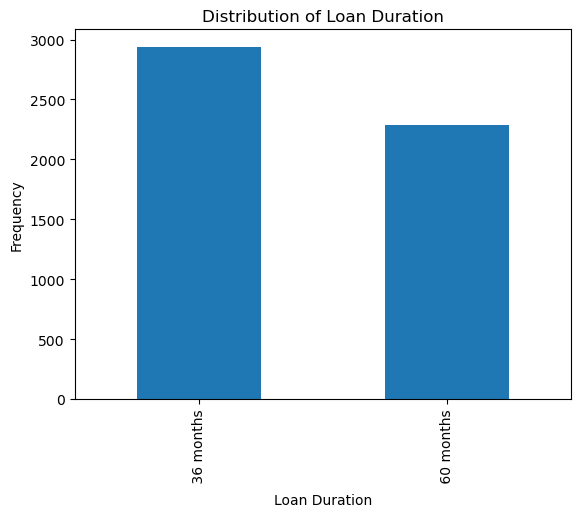

In [187]:
loan_term = loan_data['term'].value_counts()

# Create a bar plot
loan_term.plot.bar()

# Add title and labels
plt.title('Distribution of Loan Duration')
plt.xlabel('Loan Duration')
plt.ylabel('Frequency')

# Display the plot
plt.show()

### Observation 1 - the applicant who default opt for a shorter duration of loan ( 3years)

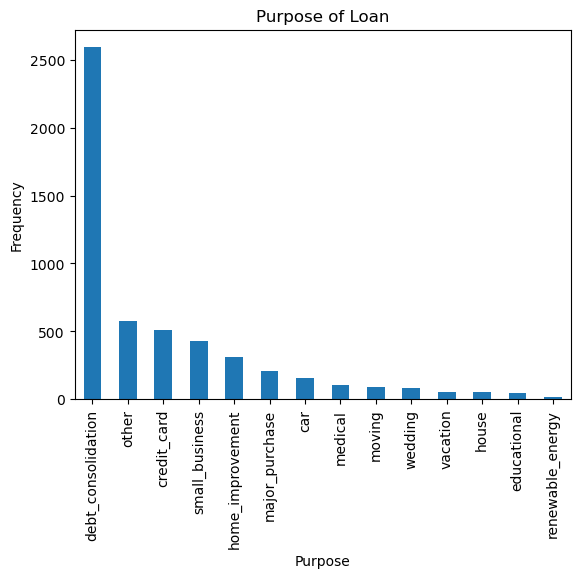

In [190]:
purpose = loan_data['purpose'].value_counts()

# Create a bar plot
purpose.plot.bar()

# Add title and labels
plt.title('Purpose of Loan')
plt.xlabel('Purpose')
plt.ylabel('Frequency')

# Display the plot
plt.show()

### Observation 2 - the main purpose of the loan for default applicants is debt_consolidation

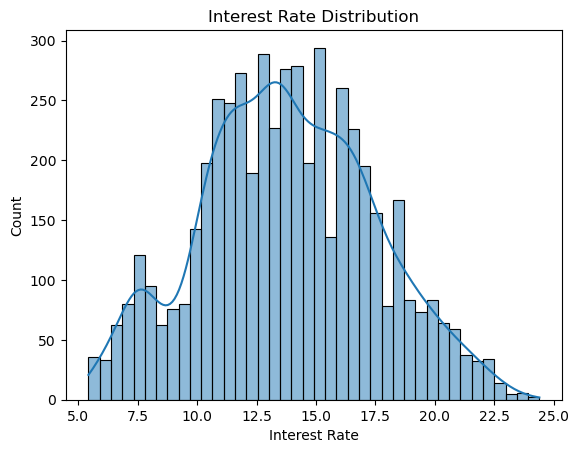

In [188]:
sns.histplot(loan_data['int_rate'], bins=40, kde=True)

# Add title and labels
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Count')

# Display the plot
plt.show()

### Observation 3  the interest rate is in the range of 11-16 % for Charged Off Applicants

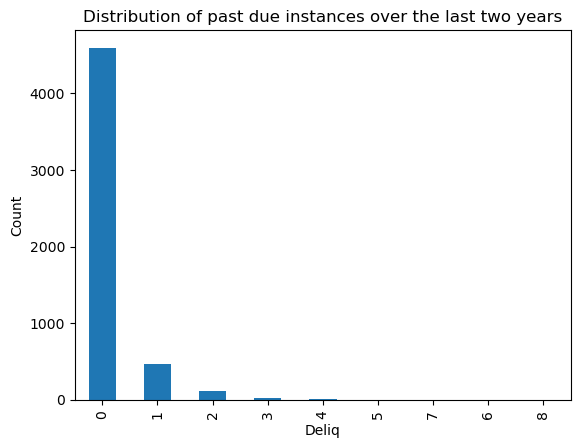

In [192]:
deliq = loan_data['delinq_2yrs'].value_counts()

# Create a bar plot
deliq.plot.bar()

# Add title and labels
plt.title('Distribution of past due instances over the last two years')
plt.xlabel('Deliq')
plt.ylabel('Count')

# Display the plot
plt.show()

#### Observation 4: Deliquency is not related to loan default as most applicants deliq count is 0

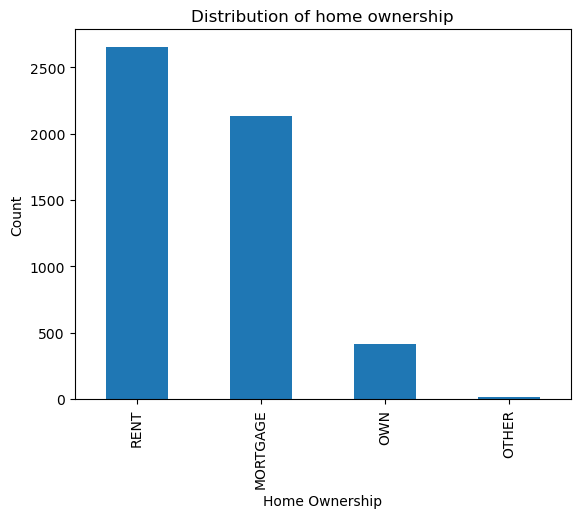

In [193]:
home_ownership = loan_data['home_ownership'].value_counts()

# Create a bar plot
home_ownership.plot.bar()

# Add title and labels
plt.title('Distribution of home ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')

# Display the plot
plt.show()

### Observation 5 - Majority of the Default applicants are either  rented  or mortgage

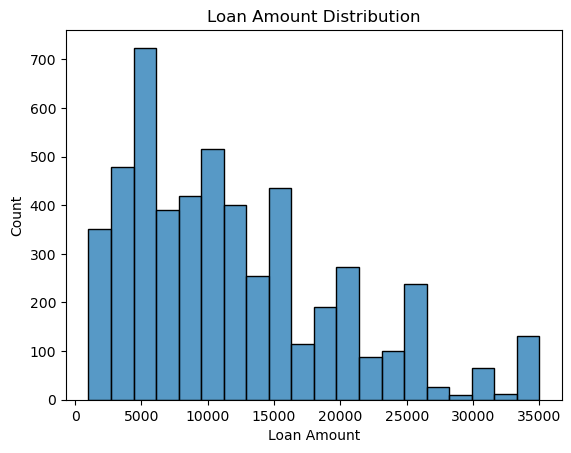

In [203]:
sns.reset_defaults()
sns.histplot(loan_data['loan_amnt'], bins = 20)
# Add title and labels


plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

# Display the plot
plt.show()

### Observation 6 - Loan Amount mostly varies from 5k to 10 k

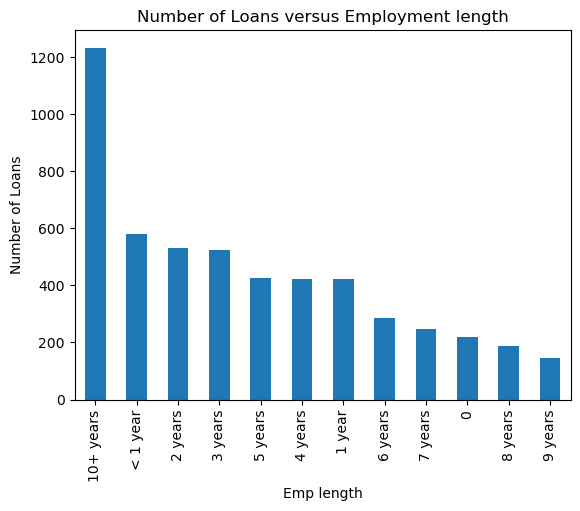

In [204]:
loan_data['emp_length'].value_counts().plot.bar()
plt.title('Number of Loans versus Employment length')
plt.xlabel('Emp length')
plt.ylabel('Number of Loans')
plt.show()

### Observation 7 : Majority of the default loans are taken by applicants with 10+ years of experience and there is an even distribution of <1 year,2years and 3 years experinced applicants

### Segmented Univariate Analysis

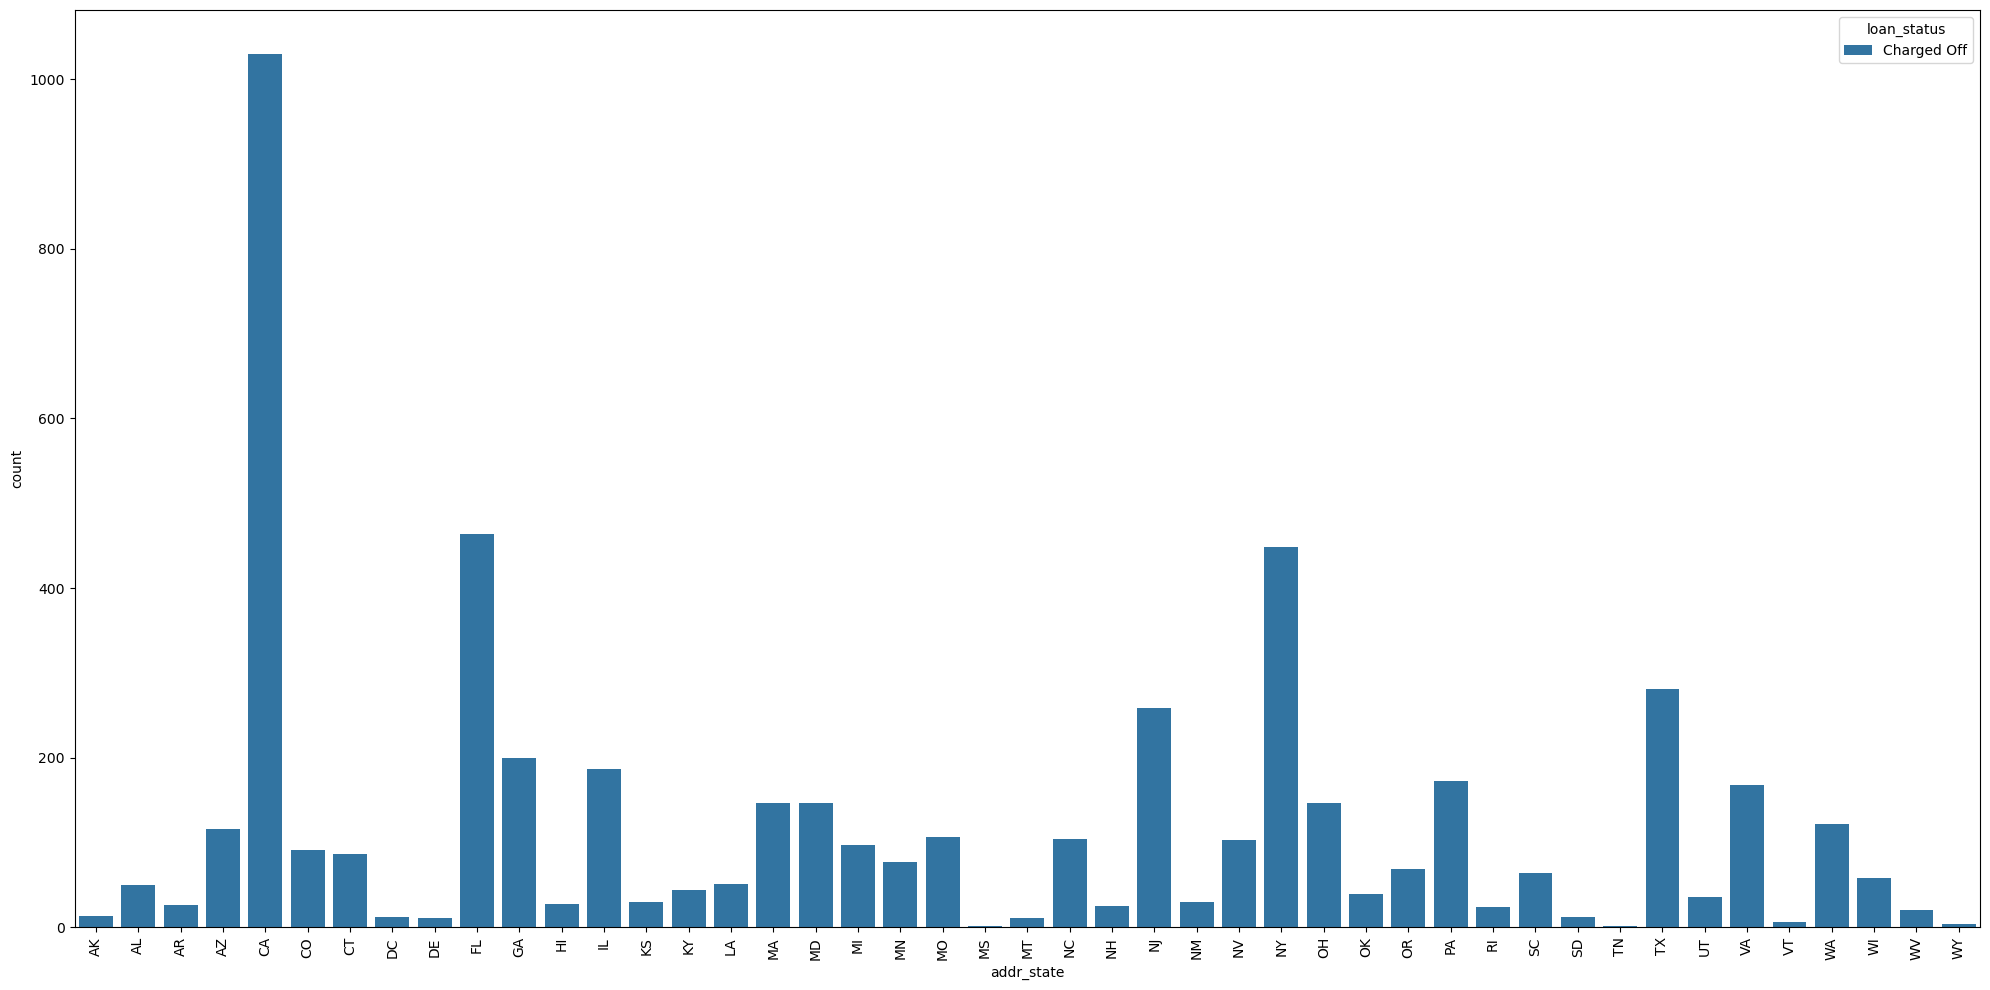

In [205]:
agg_data = loan_data.groupby(['addr_state', 'loan_status'])['loan_status'].count().reset_index(name='count')


# Create a larger figure size to accommodate the many states
plt.figure(figsize=(20, 10))

# Create a bar plot
sns.barplot(x='addr_state', y='count', hue='loan_status', data=agg_data)

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()